In [1]:
from statsbombpy import sb
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # random forest is an ensemble classifier
from sklearn import metrics

In [3]:
sb.competitions()

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2021-04-11T22:02:53.549443,2021-04-11T22:02:53.549443
1,16,1,Europe,Champions League,male,2017/2018,2021-01-23T21:55:30.425330,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [4]:
mat = sb.matches(competition_id=43, season_id=3)

credentials were not supplied. open data access only


In [5]:
mat.columns

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'data_version',
       'shot_fidelity_version', 'xy_fidelity_version'],
      dtype='object')

In [6]:
E = mat[(mat['away_score']>3) | (mat['home_score']>3)]
E

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
21,7580,2018-06-30,21:00:00.000,International - FIFA World Cup,2018,France,Argentina,4,3,available,unscheduled,2020-07-29T05:00,None,4,Round of 16,NaN,NaN,1.0.2,None,None
24,8658,2018-07-15,17:00:00.000,International - FIFA World Cup,2018,France,Croatia,4,2,available,unscheduled,2020-07-29T05:00,None,7,Final,Stadion Luzhniki,N. Pitana,1.0.2,None,None
31,7552,2018-06-23,14:00:00.000,International - FIFA World Cup,2018,Belgium,Tunisia,5,2,available,unscheduled,2020-07-29T05:00,None,2,Group Stage,Otkrytiye Arena,J. Marrufo,1.0.2,None,None
44,7525,2018-06-14,17:00:00.000,International - FIFA World Cup,2018,Russia,Saudi Arabia,5,0,available,unscheduled,2020-07-29T05:00,None,1,Group Stage,Stadion Luzhniki,N. Pitana,1.0.2,None,None
50,7554,2018-06-24,14:00:00.000,International - FIFA World Cup,2018,England,Panama,6,1,available,unscheduled,2020-07-29T05:00,None,2,Group Stage,Stadion Nizhny Novgorod,Ghead Grisha,1.0.2,None,None


In [17]:
events = sb.events(match_id = 7552)
events

credentials were not supplied. open data access only


,ball_receipt_outcome,ball_recovery_recovery_failure,block_save_block,carry_end_location,counterpress,dribble_outcome,duel_outcome,duel_type,duration,foul_committed_advantage,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 343, 'lineup': [{'player': {'id'...",Belgium,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.413,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Tunisia,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.853,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tunisia,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.093,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Belgium,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tunisia,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tunisia,00:44:03.913,Shield,NaN
3480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Belgium,00:49:10.660,Half End,NaN
3481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tunisia,00:49:10.660,Half End,NaN
3482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Belgium,00:48:07.000,Half End,NaN


In [18]:
events.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_save_block', 'carry_end_location', 'counterpress',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_penalty',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_cut_back',
       'pass_deflected', 'pass_end_location', 'pass_goal_assist',
       'pass_height', 'pass_length', 'pass_outcome', 'pass_recipient',
       'pass_shot_assist', 'pass_switch', 'pass

In [19]:
E_pass = events[['type', 'pass_angle', 'pass_height', 'pass_length', 'pass_outcome']]
E_pass

,type,pass_angle,pass_height,pass_length,pass_outcome
0,Starting XI,NaN,NaN,NaN,NaN
1,Starting XI,NaN,NaN,NaN,NaN
2,Half Start,NaN,NaN,NaN,NaN
3,Half Start,NaN,NaN,NaN,NaN
4,Half Start,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3479,Shield,NaN,NaN,NaN,NaN
3480,Half End,NaN,NaN,NaN,NaN
3481,Half End,NaN,NaN,NaN,NaN
3482,Half End,NaN,NaN,NaN,NaN


In [20]:
E_pass = E_pass[E_pass['type'] == 'Pass']
E_pass

,type,pass_angle,pass_height,pass_length,pass_outcome
6,Pass,3.141593,Ground Pass,10.000000,NaN
7,Pass,1.723446,Ground Pass,13.152946,NaN
8,Pass,-2.651635,Ground Pass,17.000000,NaN
9,Pass,1.873681,Ground Pass,16.763054,NaN
10,Pass,0.352990,Ground Pass,20.248457,NaN
...,...,...,...,...,...
943,Pass,0.764125,Ground Pass,33.241540,NaN
944,Pass,-0.510488,Ground Pass,28.653097,NaN
945,Pass,-2.098871,Ground Pass,13.892444,NaN
946,Pass,-1.570796,Ground Pass,5.000000,Unknown


In [21]:
E_pass.pass_height.unique()

array(['Ground Pass', 'High Pass', 'Low Pass'], dtype=object)

In [22]:
E_pass.pass_outcome.unique()

array([nan, 'Incomplete', 'Unknown', 'Pass Offside', 'Out',
       'Injury Clearance'], dtype=object)

In [23]:
E_pass['pass_height'] = E_pass['pass_height'].replace(['Ground Pass', 'High Pass', 'Low Pass'], [3, 1, 2])
E_pass

<ipython-input-23-fc7b1a033553>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E_pass['pass_height'] = E_pass['pass_height'].replace(['Ground Pass', 'High Pass', 'Low Pass'], [3, 1, 2])


,type,pass_angle,pass_height,pass_length,pass_outcome
6,Pass,3.141593,3,10.000000,NaN
7,Pass,1.723446,3,13.152946,NaN
8,Pass,-2.651635,3,17.000000,NaN
9,Pass,1.873681,3,16.763054,NaN
10,Pass,0.352990,3,20.248457,NaN
...,...,...,...,...,...
943,Pass,0.764125,3,33.241540,NaN
944,Pass,-0.510488,3,28.653097,NaN
945,Pass,-2.098871,3,13.892444,NaN
946,Pass,-1.570796,3,5.000000,Unknown


In [24]:
E_pass['pass_outcome'] = E_pass['pass_outcome'].fillna(1)
E_pass

<ipython-input-24-3e78a7b7e735>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E_pass['pass_outcome'] = E_pass['pass_outcome'].fillna(1)


,type,pass_angle,pass_height,pass_length,pass_outcome
6,Pass,3.141593,3,10.000000,1
7,Pass,1.723446,3,13.152946,1
8,Pass,-2.651635,3,17.000000,1
9,Pass,1.873681,3,16.763054,1
10,Pass,0.352990,3,20.248457,1
...,...,...,...,...,...
943,Pass,0.764125,3,33.241540,1
944,Pass,-0.510488,3,28.653097,1
945,Pass,-2.098871,3,13.892444,1
946,Pass,-1.570796,3,5.000000,Unknown


In [25]:
E_pass['pass_outcome'] = E_pass['pass_outcome'].replace(['Unknown', 'Incomplete', 'Out', 'Pass Offside', 'Injury Clearance'], 0)
E_pass

<ipython-input-25-a6dbed5f38a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E_pass['pass_outcome'] = E_pass['pass_outcome'].replace(['Unknown', 'Incomplete', 'Out', 'Pass Offside', 'Injury Clearance'], 0)


,type,pass_angle,pass_height,pass_length,pass_outcome
6,Pass,3.141593,3,10.000000,1
7,Pass,1.723446,3,13.152946,1
8,Pass,-2.651635,3,17.000000,1
9,Pass,1.873681,3,16.763054,1
10,Pass,0.352990,3,20.248457,1
...,...,...,...,...,...
943,Pass,0.764125,3,33.241540,1
944,Pass,-0.510488,3,28.653097,1
945,Pass,-2.098871,3,13.892444,1
946,Pass,-1.570796,3,5.000000,0


In [26]:
E_pass.pass_outcome.unique()

array([1, 0], dtype=int64)

In [27]:
E_pass = E_pass[['pass_angle', 'pass_height', 'pass_length', 'pass_outcome']]
E_pass

,pass_angle,pass_height,pass_length,pass_outcome
6,3.141593,3,10.000000,1
7,1.723446,3,13.152946,1
8,-2.651635,3,17.000000,1
9,1.873681,3,16.763054,1
10,0.352990,3,20.248457,1
...,...,...,...,...
943,0.764125,3,33.241540,1
944,-0.510488,3,28.653097,1
945,-2.098871,3,13.892444,1
946,-1.570796,3,5.000000,0


### Here *pass_outcome* is the dependent variable and the other columns represent the independent variables

In [29]:
x = E_pass[['pass_angle', 'pass_height', 'pass_length']]
y = E_pass['pass_outcome']
x.shape, y.shape

((942, 3), (942,))

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.4, random_state = 0)

In [31]:
x_train

,pass_angle,pass_height,pass_length
863,0.674741,3,6.403124
883,0.912908,3,27.802877
306,-2.819842,3,9.486833
641,1.471128,3,20.099750
632,-1.249046,3,18.973665
...,...,...,...
841,2.289626,3,10.630146
198,-1.971037,3,28.231188
635,-2.843094,3,13.601471
565,-0.244979,3,4.123106


### Now we apply Random Forest and build the model

In [32]:
rf = RandomForestClassifier(n_estimators = 200)

### Now we use the training data to fit the model

In [33]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [34]:
y_predicted = rf.predict(x_test)

In [35]:
y_predicted

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,

### We will now generate the *Error Matrix* also known as the *Confusion Matrix* which will tell us how accurate our model is

<AxesSubplot:xlabel='Predicted', ylabel='Original'>

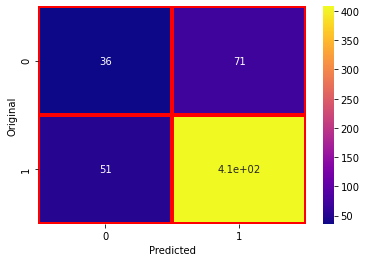

In [36]:
error_matrix = pd.crosstab(y_test, y_predicted, rownames=['Original'], colnames=['Predicted'])
sns.heatmap(error_matrix, annot=True, cmap = 'plasma', linewidths = 3, linecolor = 'red')

In [37]:
accuracy = metrics.accuracy_score(y_test, y_predicted)
accuracy

0.784452296819788

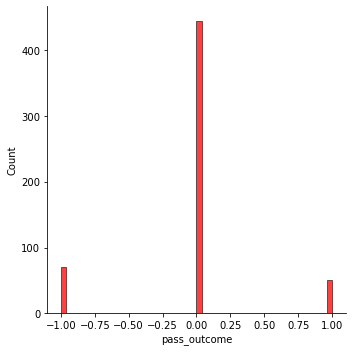

In [38]:
sns.displot((y_test - y_predicted), bins = 50, color = 'red')